### scikit Learn 맛보기
- Iris 분류: 결정트리, 서포트벡터머신(SVM), 로지스틱 회귀

#####1. 데이터 전처리

In [27]:
from sklearn.datasets import load_iris # 이미 전처리 다 해놨다
iris = load_iris()

In [28]:
type(iris)

sklearn.utils.Bunch

In [29]:
iris.keys() # 일종의 딕셔너리 구조 형태로 구성 (데이터프레임은 아니다)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
iris['target_names'] # iris.target_names 
# 위의 코드 2개 모두 같은 의미

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
# Feature data - X, numpy dimension array
iris.data[:5]
type(iris.data) #iris 데이터 형태는 numpy array 형태로 구성

numpy.ndarray

In [32]:
# Feaure name (개체 명)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
feature_names = [name[:-5] for name in iris.feature_names]
df = pd.DataFrame(iris.data, columns=feature_names)
df['target'] = iris.target                          # y data
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [36]:
# 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
df.groupby('target').describe()

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [38]:
df.groupby('target').agg(['mean','std']) # target 필드를 기준으로 평균과 표준 편차만 조회

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [39]:
import matplotlib.pyplot as plt
setosa = pd.DataFrame(iris.data[:50], columns=feature_names)# target의 값이 0으로 저장되어 있는 setosa의 값
setosa.shape

(50, 4)

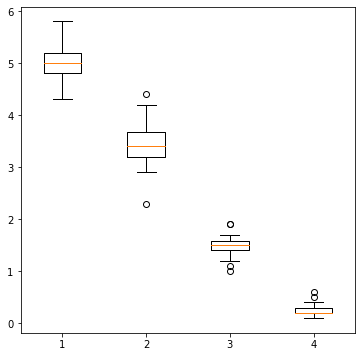

In [40]:
plt.figure(figsize = (6,6))
plt.boxplot(setosa.T) # 축을 뒤집는 부분 (transpose한 부분)
plt.show()

In [41]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

##### 2. 학습과 테스트 데이터로 분리하기

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=2022)
# 훈련용(train) 데이터 : 시험용(test) 데이터 = 3:1 비율
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [43]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 38, 37]))

In [48]:
# y값을 균등하게 뽑으려면 stratify 옵션을 준다
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target ,stratify = iris.target, random_state=2022)
# 훈련용(train) 데이터 : 시험용(test) 데이터 = 3:1 비율
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify = iris.target, test_size=0.2, random_state=2021)
# 훈련용(train) 데이터 : 시험용(test) 데이터 = 3:1 비율
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

##### 3.학습
- 결정 트리(Decision Tree)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# 모델(모듈) 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state=2022)

In [52]:
# 모델 하이퍼 파라미터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [53]:
# 학습(훈련)
dtc.fit(X_train, y_train) #sklearn에서 학습을 시키는 함수 (훈련용 데이터, 훈련용 데이터 레이블)

DecisionTreeClassifier(random_state=2022)

##### 4. 예측

In [54]:
pred_dt = dtc.predict(X_test) # y_test(답안지) / pred_dt(시험 답안)

In [55]:
result = pd.DataFrame({'y':y_test, 'DT':pred_dt})
result.head()

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


##### 5. 평가

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9

In [57]:
# 4, 5번을 한 번에 하는 방법도 있음 (예측 + 평가)
dtc.score(X_test, y_test)

0.9

##### Soft Vector Machine (SVM)

In [58]:
# 3) 모델(모듈) 생성 및 학습 (1,2번 과정은 위의 과정과 동일)
from sklearn.svm import SVC
svc = SVC(random_state = 2022) # 모델 생성
svc.fit(X_train, y_train) # 훈련용 데이터 학습

SVC(random_state=2022)

In [59]:
# 4) 예측
pred_sv = svc.predict(X_test)

In [60]:
# 5) 평가
accuracy_score(y_test,pred_sv)

0.9

- Logistic Regression

In [61]:
# 3) 모델 생성
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022, max_iter=500) # 이 방법도 좋은 방법은 아니다
lrc.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=2022)

In [62]:
# 4) 예측
pred_lr = lrc.predict(X_test)

In [ ]:
lrc2 = LogisticRegression(random_state = 2022) # max_iter를 100만 줬을 때 conversions 에러 나옴
lrc2.fit(X_train,y_train)

In [64]:
from sklearn.preprocessing import MinMaxScaler
iris_scaled = MinMaxScaler().fit_transform(iris.data) # 0에서 1사이의 정규 분포 상으로 조율하는 작업

In [65]:
iris_scaled[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [66]:
X_train2, X_test2, _ , _ = train_test_split(
    iris_scaled, iris.target, stratify =iris.target, test_size= 0.2, random_state = 2022) 
# y_train, y_test는 변하지 않기 때문에 여기서는 정의하지 않았다

In [67]:
# 5. 평가
accuracy_score(y_test, pred_lr)

0.9333333333333333

- 3가지 모델 비교하기

In [69]:
dtc.score(X_test, y_test), svc.score(X_test, y_test), lrc.score(X_test, y_test)

(0.9, 0.9, 0.9333333333333333)

In [71]:
result['SV'] = pred_sv
result['LR'] = pred_lr
result.head()

,y,DT,SV,LR
0,0,0,0,0
1,1,1,1,1
2,1,2,1,1
3,2,2,2,2
4,0,0,0,0
